# INTRODUCTION
Diabetes is a chronic disease and a major challenge across the world. Hence, identifying factors associated with disease is very important. Accurate and fast diagnosis/prediction of the disease will help us to avoid any future complications associated with diabetes. There are certain populations which are very prone to different diseases in comparison to other populations.


## Variables

|Variable|Explaination of Variable|
|:-----|:-----|
|**Pregnancies**|Pregnancies|
|**Glucose**| A fasting blood sugar level less than 100 mg/dL is normal. A fasting blood sugar level from 100 to 125 mg/dL is considered prediabetes. If it's 126 mg/dL or higher on two separate tests, you have diabetes.|
|**Blood Pressure**|Blood pressure should be below 140/80mmHg for people with diabetes or below 130/80mmHg if you have kidney or eye disease or any condition that affects blood vessels and blood supply to the brain.|
|**Blood Pressure**|Blood pressure should be below 140/80mmHg for people with diabetes or below 130/80mmHg if you have kidney or eye disease or any condition that affects blood vessels and blood supply to the brain.|
|**Skin Thickness**|Triceps skin fold thickness (mm)|
|**Insulin**|2-Hour serum insulin (mu U/ml)|
|**BMI**|Body mass index (weight in kg/(height in m)^2)|
|**Diabetes Pedigree Function**|Diabetes Pedigree Function: indicates the function which scores likelihood of diabetes based on family history. Age: indicates the age of the person. Outcome: indicates if the patient had a diabetes or not (1 = yes, 0 = no)|
|**Age**|Age (years)|
|**Outcome**|Class variable (0 or 1) 0 mean non-diabetic and 1 means diabetic|


In [3]:
# loading some libraries
import numpy as np
import pandas as pd
import missingno as msno
import seaborn as sns
import matplotlib.pyplot as plt

# Eda

In [4]:
# loading data
diabetes = pd.read_csv("diabetes.csv")

# head
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
# tail
diabetes.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [6]:
# so, there are 768 rows and 9 columns.
diabetes.shape

(768, 9)

In [7]:
# checking data type of all column.
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [8]:
# summary of all columns
diabetes.describe(include="all")

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [9]:
# applying lambda function
# because it contain wrong values

diabetes["Pregnancies"] = diabetes["Pregnancies"].apply(lambda x: np.nan if x>10 else x)

In [10]:
# applying lambda on BMI changing zero into np.nan
# because BMI contain wrong value
diabetes["BMI"] = diabetes["BMI"].apply(lambda x: np.nan if x==0 else x)

In [11]:
# checking summary again
diabetes.describe(include="all")

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,734.000000,768.000000,768.000000,768.000000,768.000000,757.000000,768.000000,768.000000,768.000000
mean,3.452316,120.894531,69.105469,20.536458,79.799479,32.457464,0.471876,33.240885,0.348958
std,2.882849,31.972618,19.355807,15.952218,115.244002,6.924988,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.300000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,10.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [12]:
# changing data type of two column "pregnencies and outcome"
category = ["Pregnancies","Outcome"]
for i in category:
    diabetes[i] = diabetes[i].astype("category")

In [13]:
# checking null value
diabetes.isnull().sum()

Pregnancies                 34
Glucose                      0
BloodPressure                0
SkinThickness                0
Insulin                      0
BMI                         11
DiabetesPedigreeFunction     0
Age                          0
Outcome                      0
dtype: int64

<AxesSubplot:>

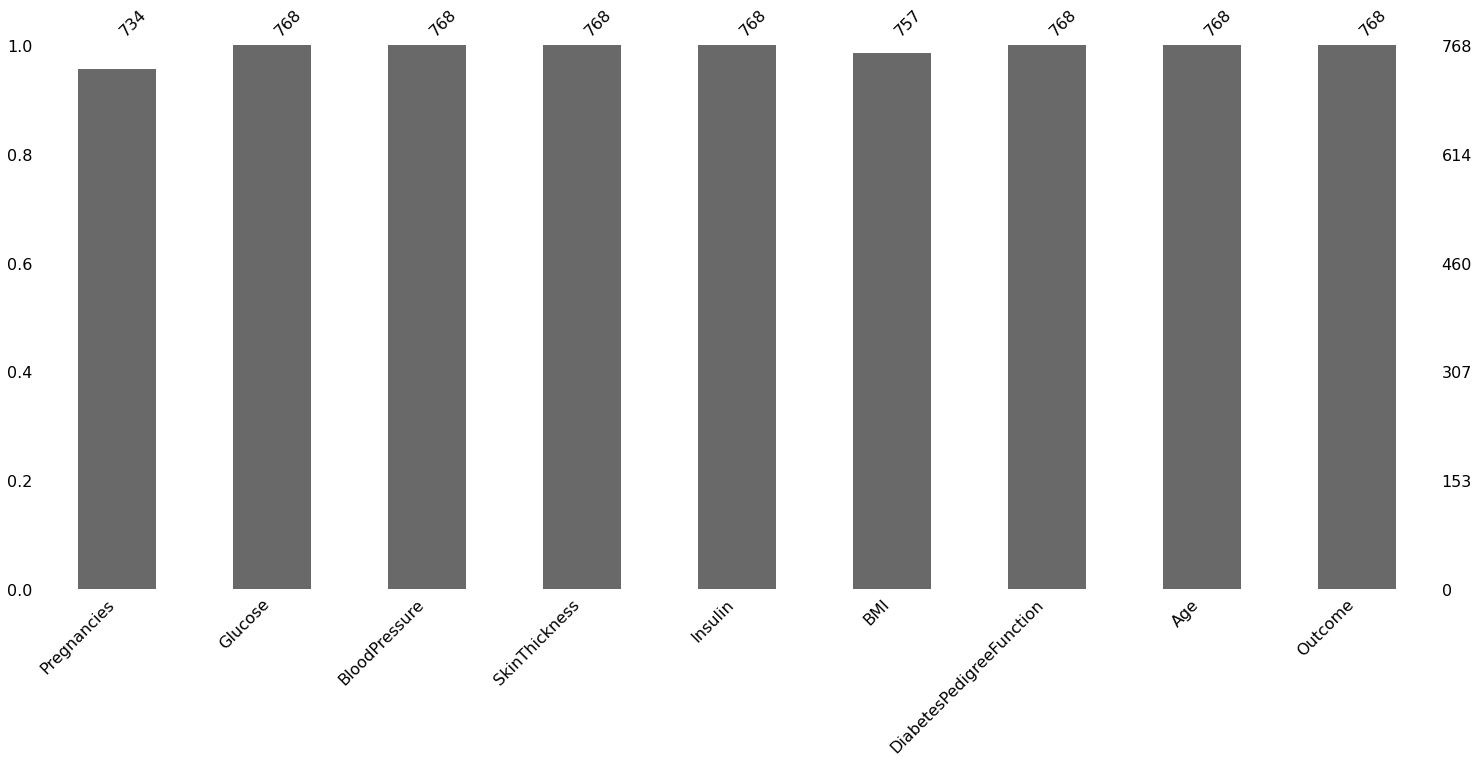

In [14]:
# checking null value in visual form
msno.bar(diabetes)

<AxesSubplot:>

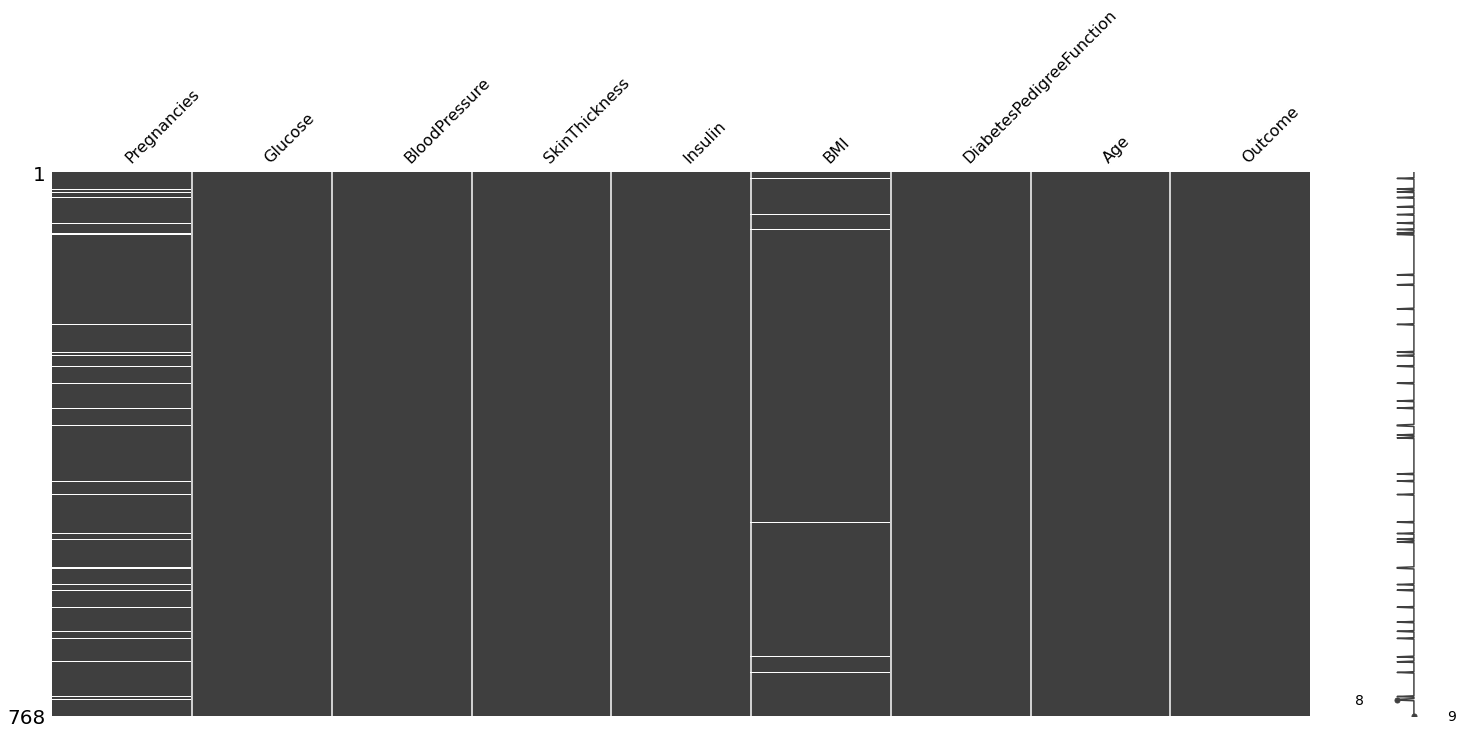

In [15]:
# so, checking pattern in null value. but there is no
msno.matrix(diabetes)

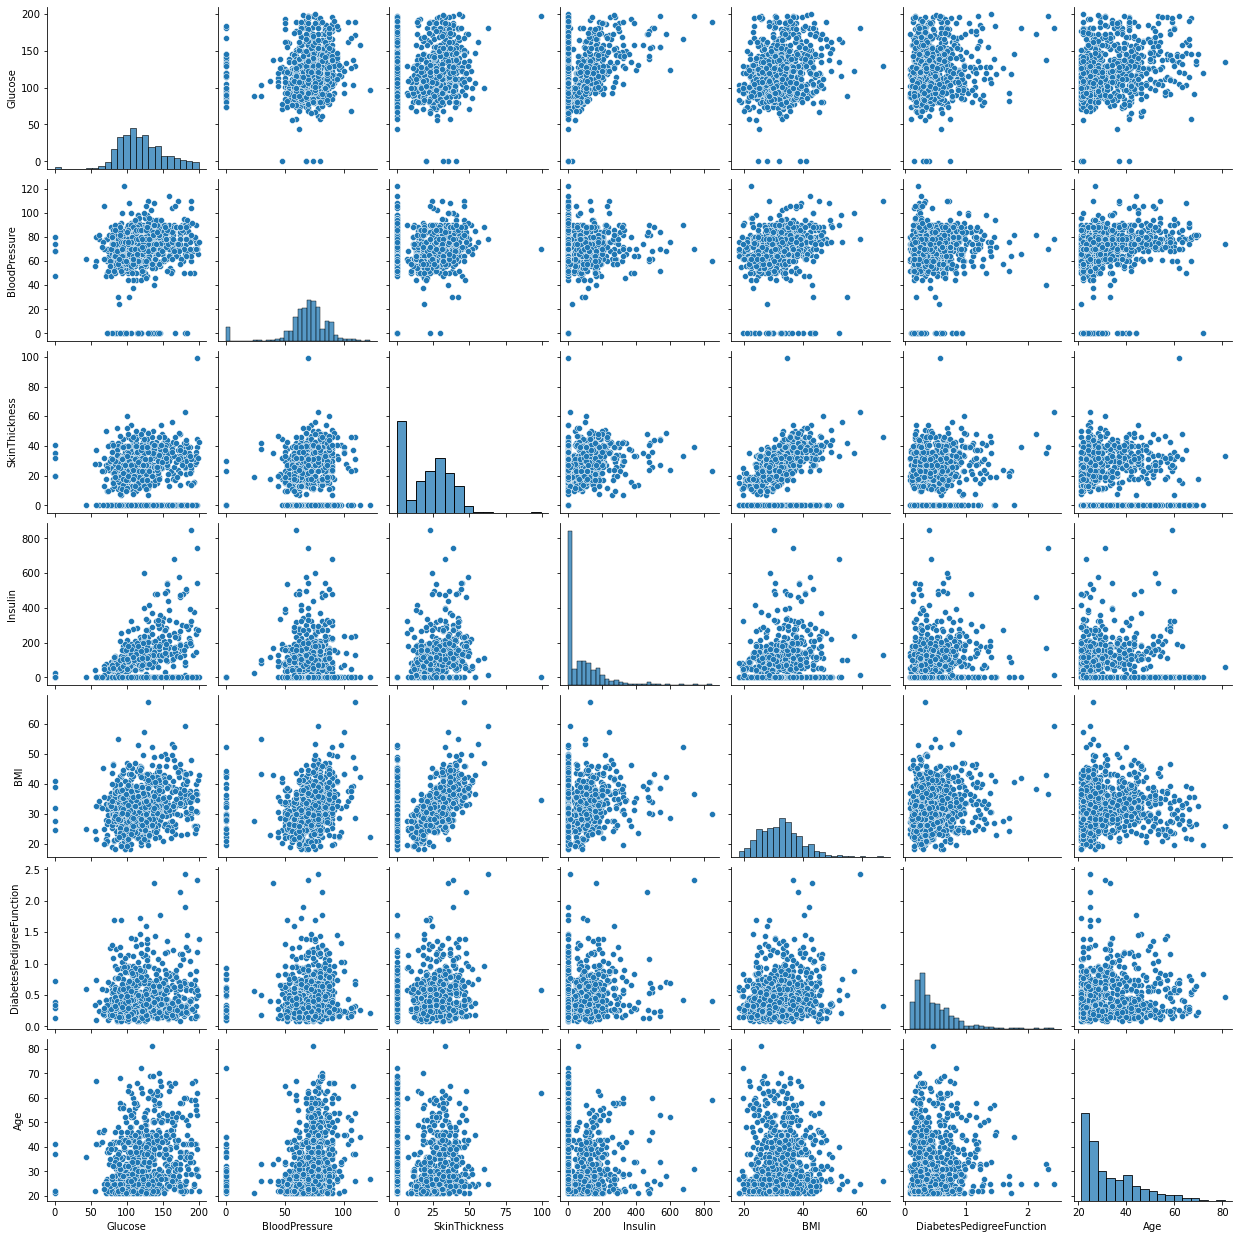

In [16]:
# checking the pattern in all the columns
# with this checking skewness of the data.
sns.pairplot(diabetes)

### Calculate appropriate measures of central tendency for Glucose and outcome column only?

In [17]:
diabetes_central_tendency = diabetes[["Glucose","Outcome"]]
diabetes_central_tendency

,Glucose,Outcome
0,148,1
1,85,0
2,183,1
3,89,0
4,137,1
...,...,...
763,101,0
764,122,0
765,121,0
766,126,1


In [18]:
diabetes_central_tendency.mean()

Glucose    120.894531
dtype: float64

In [19]:
diabetes_central_tendency.mode()

,Glucose,Outcome
0,99,0
1,100,NaN


In [20]:
diabetes_central_tendency.median()

Glucose    117.0
dtype: float64

### Please create an appropriate plot to examine the relationship between Age and Glucose.

<AxesSubplot:xlabel='Age', ylabel='Glucose'>

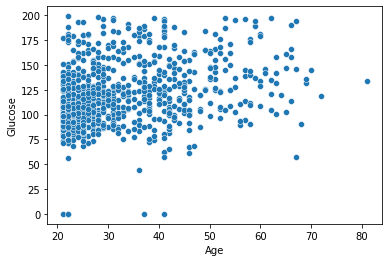

In [21]:
sns.scatterplot(x="Age",y="Glucose",data=diabetes)

### Please create an appropriate plot to see the distribution of Outcome variable?

<AxesSubplot:xlabel='Outcome', ylabel='Glucose'>

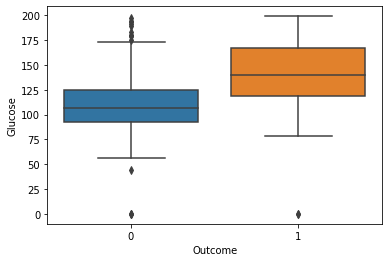

In [22]:
# if glucose greater than  126 then it means a diabetes
# 100 to 125 shows prediabetes -- this stage blood sugar higher but no symptoms of diabetes
sns.boxplot(x="Outcome",y="Glucose",data=diabetes)

### Please examine the distribution of numerical data and explain which variable normally distributed and which variable is seems to be skewed. Please also tell the direction of skewness.

#### All the data are skewed

In [23]:
# mako pallet
sns.set_palette("mako")

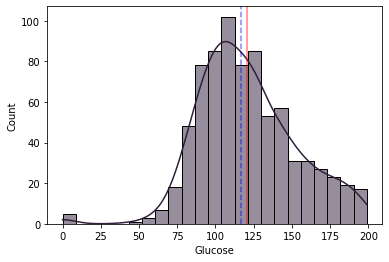

In [24]:
# glucose is left high skewed
sns.histplot(data=diabetes["Glucose"],kde=True)
plt.axvline(x=diabetes.Glucose.mean(),c="red",alpha=0.5,label="mean")
plt.axvline(x=diabetes.Glucose.median(),c="blue",alpha=0.5,ls="--",label="median")

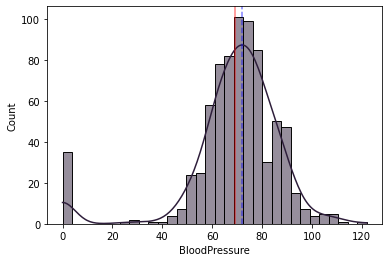

In [25]:
# blood pressure is also left high skewed
sns.histplot(data=diabetes["BloodPressure"],kde=True)
plt.axvline(x=diabetes.BloodPressure.mean(),c="red",alpha=0.5,label="mean")
plt.axvline(x=diabetes.BloodPressure.median(),c="blue",alpha=0.5,ls="--",label="median")

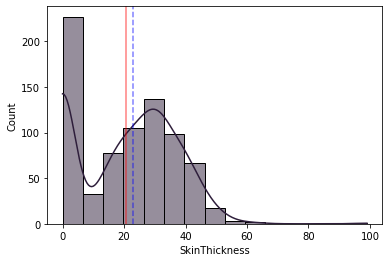

In [26]:
# skinthickness is also right high skewed
sns.histplot(data=diabetes["SkinThickness"],kde=True)
plt.axvline(x=diabetes.SkinThickness.mean(),c="red",alpha=0.5,label="mean")
plt.axvline(x=diabetes.SkinThickness.median(),c="blue",alpha=0.5,ls="--",label="median")

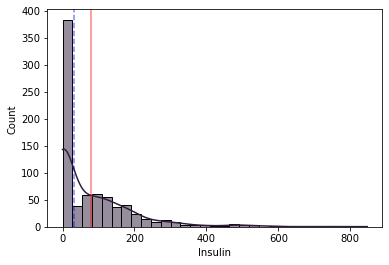

In [27]:
# insulin is also right high skewed
sns.histplot(data=diabetes["Insulin"],kde=True)
plt.axvline(x=diabetes.Insulin.mean(),c="red",alpha=0.5,label="mean")
plt.axvline(x=diabetes.Insulin.median(),c="blue",alpha=0.5,ls="--",label="median")

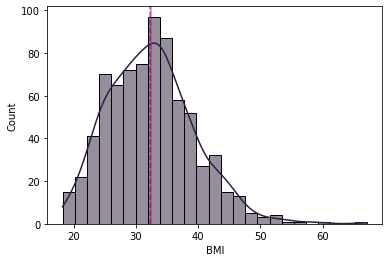

In [28]:
# BMI i also right skewed
sns.histplot(data=diabetes["BMI"],kde=True)
plt.axvline(x=diabetes.BMI.mean(),c="red",alpha=0.5,label="mean")
plt.axvline(x=diabetes.BMI.median(),c="blue",alpha=0.5,ls="--",label="median")

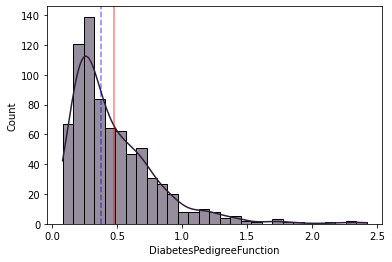

In [29]:
# diabetes pedigree function is also right skew
sns.histplot(data=diabetes["DiabetesPedigreeFunction"],kde=True)
plt.axvline(x=diabetes.DiabetesPedigreeFunction.mean(),c="red",alpha=0.5,label="mean")
plt.axvline(x=diabetes.DiabetesPedigreeFunction.median(),c="blue",alpha=0.5,ls="--",label="median")

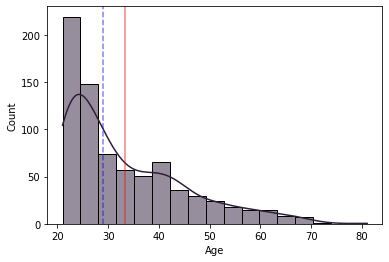

In [30]:
# age is also right skewed
# it is skewed because we are taking different age group of people
sns.histplot(data=diabetes["Age"],kde=True)
plt.axvline(x=diabetes.Age.mean(),c="red",alpha=0.5,label="mean")
plt.axvline(x=diabetes.Age.median(),c="blue",alpha=0.5,ls="--",label="median")

### Please calculate the skewness value and divide variables into symmetrical, moderately skewed and highly skewed.

In [31]:
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148,72,35,0,33.6,0.627,50,1
1,1.0,85,66,29,0,26.6,0.351,31,0
2,8.0,183,64,0,0,23.3,0.672,32,1
3,1.0,89,66,23,94,28.1,0.167,21,0
4,0.0,137,40,35,168,43.1,2.288,33,1


In [32]:
diabetes.skew()

Glucose                     0.173754
BloodPressure              -1.843608
SkinThickness               0.109372
Insulin                     2.272251
BMI                         0.593970
DiabetesPedigreeFunction    1.919911
Age                         1.129597
dtype: float64

In [33]:
from scipy.stats import skew

Pregnancies
nan


C:\anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


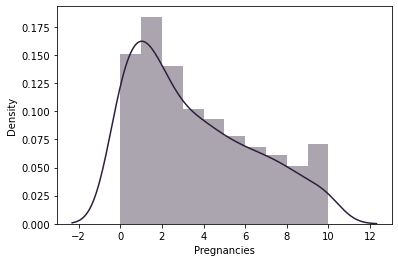

Glucose
0.17341395519987735


C:\anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


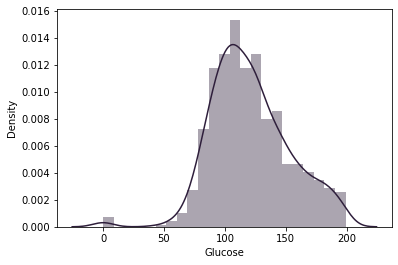

BloodPressure
-1.8400052311728738


C:\anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


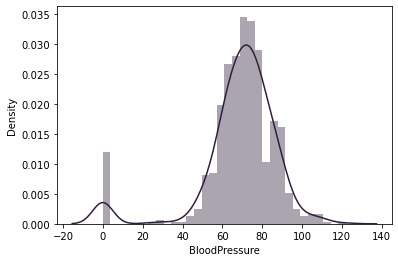

SkinThickness
0.109158762323673


C:\anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


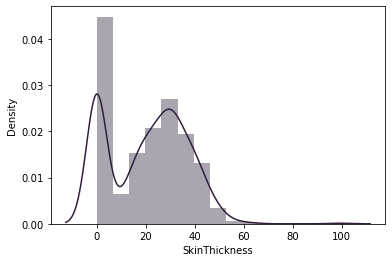

Insulin
2.2678104585131753


C:\anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


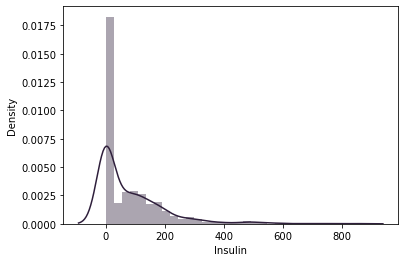

BMI
nan


C:\anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


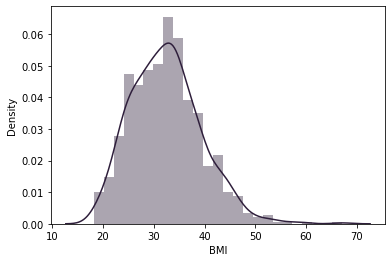

DiabetesPedigreeFunction
1.9161592037386292


C:\anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


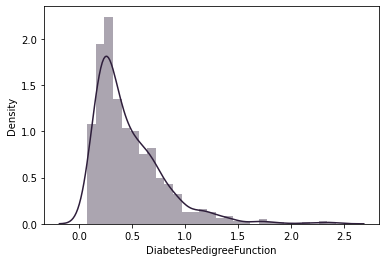

Age
1.127389259531697


C:\anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


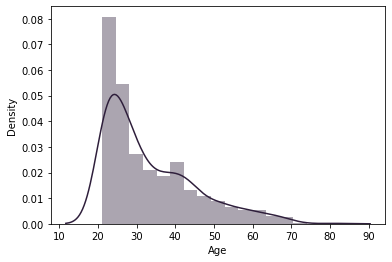

Outcome
0.6337757030614577


C:\anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


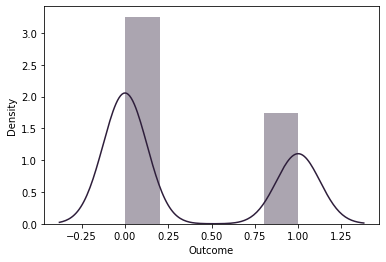

In [34]:
for col in diabetes:
    print(col)
    print(skew(diabetes[col]))
    
    plt.figure()
    sns.distplot(diabetes[col])
    plt.show()

### Checking coorelation.

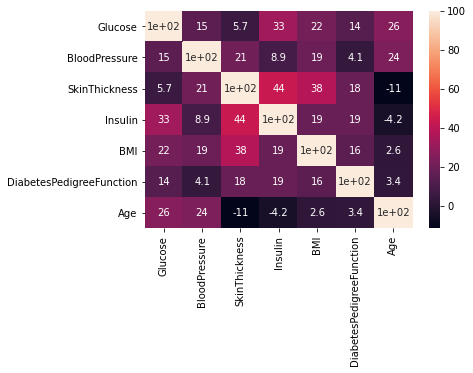

In [37]:
# checking coorelation with with variable by the use of heatmap.
# the lighter part shows the coorelation 
# and darker part shows negative coorelation.

sns.heatmap(diabetes.corr()*100,annot=True)
plt.show()

In [36]:
# checking coorelation also in nnumerical terms without heatmap
diabetes.corr()*100

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Glucose,100.000000,15.258959,5.732789,33.135711,21.929033,13.733730,26.351432
BloodPressure,15.258959,100.000000,20.737054,8.893338,19.432754,4.126495,23.952795
SkinThickness,5.732789,20.737054,100.000000,43.678257,38.458605,18.392757,-11.397026
Insulin,33.135711,8.893338,43.678257,100.000000,18.535661,18.507093,-4.216295
BMI,21.929033,19.432754,38.458605,18.535661,100.000000,15.538175,2.584146
DiabetesPedigreeFunction,13.733730,4.126495,18.392757,18.507093,15.538175,100.000000,3.356131
Age,26.351432,23.952795,-11.397026,-4.216295,2.584146,3.356131,100.000000
